In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [40]:
df = pd.read_csv("Indus_Elect.csv")

In [41]:
df

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH
0,Near West Side,Industrial,Industrial,0,0,0,0,0,0,0,0,0,0,0,0,0
1,North Lawndale,Industrial,Industrial,0,7670,3828,1701,3416,4208,4714,5175,4363,3994,6656,11423,57148
2,Brighton Park,Industrial,Industrial,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hermosa,Industrial,Industrial,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Brighton Park,Industrial,Industrial,0,0,0,0,0,0,0,0,0,0,0,0,0
5,North Lawndale,Industrial,Industrial,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Near West Side,Industrial,Industrial,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Albany Park,Industrial,Industrial,4387,3671,4849,4923,6580,8196,7074,7556,4655,6193,12597,8237,78918
8,Archer Heights,Industrial,Industrial,1100,634,508,456,552,829,4405,1304,895,657,784,1586,13710
9,Armour Square,Industrial,Industrial,25376,22991,18723,22177,31710,32590,68346,52451,35634,27202,27003,33844,398047


In [54]:
#Checking means for every row for removal of outliers
a = 0
div = 0
m=0
n=0
for i in range(len(df)):
        if(df.loc[i,"KWH DECEMBER 2010"] < 100000 and df.loc[i,"KWH DECEMBER 2010"]!=0):
            m+=df.loc[i,"KWH DECEMBER 2010"]
            n+=1

a=0
div=0
for j in df.columns[3:14]:
    for i in range(len(df)):
        if(df.loc[i,j] < 100000 and df.loc[i,j]!=0):
            a+=df.loc[i,j]
            div+=1
    print(a/div)
    a = 0
    div = 0
print(m/n)

10166.42857142857
7830.0
6817.238095238095
7951.285714285715
12449.608695652174
14455.166666666666
13006.95652173913
12151.217391304348
8702.347826086956
10667.041666666666
8990.130434782608
10974.782608695652


In [55]:
#Replaced Outliers with the average values(neglecting the industries which dont use)
#Index no 15 and 41
df1=df
a = 0
div = 0
m=0
n=0
for i in range(len(df1)):
        if(df1.loc[i,"KWH DECEMBER 2010"] < 100000 and df1.loc[i,"KWH DECEMBER 2010"]!=0):
            m+=df.loc[i,"KWH DECEMBER 2010"]
            n+=1
for i in range(len(df1)):
        if(df1.loc[i,"KWH DECEMBER 2010"] > 100000 and df1.loc[i,"KWH DECEMBER 2010"]!=0):
            df.loc[i,"KWH DECEMBER 2010"] = m/n
a=0
div=0
for j in df.columns[3:14]:
    for i in range(len(df1)):
        if(df1.loc[i,j] < 100000 and df1.loc[i,j]!=0):
            a+=df1.loc[i,j]
            div+=1
    for i in range(len(df)):
        if(df1.loc[i,j] > 100000 and df1.loc[i,j]!=0):
            df.loc[i,j] = a/div
    a = 0
    div = 0
df1

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH
0,Near West Side,Industrial,Industrial,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,North Lawndale,Industrial,Industrial,0.000000,7670.0,3828.000000,1701.000000,3416.000000,4208.000000,4714.000000,5175.000000,4363.000000,3994.000000,6656.000000,11423.000000,57148
2,Brighton Park,Industrial,Industrial,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,Hermosa,Industrial,Industrial,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,Brighton Park,Industrial,Industrial,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
5,North Lawndale,Industrial,Industrial,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
6,Near West Side,Industrial,Industrial,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
7,Albany Park,Industrial,Industrial,4387.000000,3671.0,4849.000000,4923.000000,6580.000000,8196.000000,7074.000000,7556.000000,4655.000000,6193.000000,12597.000000,8237.000000,78918
8,Archer Heights,Industrial,Industrial,1100.000000,634.0,508.000000,456.000000,552.000000,829.000000,4405.000000,1304.000000,895.000000,657.000000,784.000000,1586.000000,13710
9,Armour Square,Industrial,Industrial,25376.000000,22991.0,18723.000000,22177.000000,31710.000000,32590.000000,68346.000000,52451.000000,35634.000000,27202.000000,27003.000000,33844.000000,398047


In [56]:
summ=0
for i in range(len(df1)):
    for j in df1.columns[3:14]:
        summ+=df1.loc[i,j]
    df1.loc[i,"TOTAL KWH"] = summ
    summ = 0
df1

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH
0,Near West Side,Industrial,Industrial,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,North Lawndale,Industrial,Industrial,0.000000,7670.0,3828.000000,1701.000000,3416.000000,4208.000000,4714.000000,5175.000000,4363.000000,3994.000000,6656.000000,11423.000000,45725.000000
2,Brighton Park,Industrial,Industrial,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Hermosa,Industrial,Industrial,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Brighton Park,Industrial,Industrial,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,North Lawndale,Industrial,Industrial,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Near West Side,Industrial,Industrial,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Albany Park,Industrial,Industrial,4387.000000,3671.0,4849.000000,4923.000000,6580.000000,8196.000000,7074.000000,7556.000000,4655.000000,6193.000000,12597.000000,8237.000000,70681.000000
8,Archer Heights,Industrial,Industrial,1100.000000,634.0,508.000000,456.000000,552.000000,829.000000,4405.000000,1304.000000,895.000000,657.000000,784.000000,1586.000000,12124.000000
9,Armour Square,Industrial,Industrial,25376.000000,22991.0,18723.000000,22177.000000,31710.000000,32590.000000,68346.000000,52451.000000,35634.000000,27202.000000,27003.000000,33844.000000,364203.000000


In [58]:
df = df1
df

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH
0,Near West Side,Industrial,Industrial,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,North Lawndale,Industrial,Industrial,0.000000,7670.0,3828.000000,1701.000000,3416.000000,4208.000000,4714.000000,5175.000000,4363.000000,3994.000000,6656.000000,11423.000000,45725.000000
2,Brighton Park,Industrial,Industrial,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Hermosa,Industrial,Industrial,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Brighton Park,Industrial,Industrial,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,North Lawndale,Industrial,Industrial,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Near West Side,Industrial,Industrial,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Albany Park,Industrial,Industrial,4387.000000,3671.0,4849.000000,4923.000000,6580.000000,8196.000000,7074.000000,7556.000000,4655.000000,6193.000000,12597.000000,8237.000000,70681.000000
8,Archer Heights,Industrial,Industrial,1100.000000,634.0,508.000000,456.000000,552.000000,829.000000,4405.000000,1304.000000,895.000000,657.000000,784.000000,1586.000000,12124.000000
9,Armour Square,Industrial,Industrial,25376.000000,22991.0,18723.000000,22177.000000,31710.000000,32590.000000,68346.000000,52451.000000,35634.000000,27202.000000,27003.000000,33844.000000,364203.000000


In [43]:
df.to_csv("Indus_Elect_Clean.csv",index=False)

In [44]:
df = pd.read_csv("Indus_Therm.csv")
df1 = df
df1.columns

Index(['COMMUNITY AREA NAME', 'BUILDING TYPE', 'BUILDING_SUBTYPE',
       'THERM JANUARY 2010', 'THERM FEBRUARY 2010', 'THERM MARCH 2010',
       'TERM APRIL 2010', 'THERM MAY 2010', 'THERM JUNE 2010',
       'THERM JULY 2010', 'THERM AUGUST 2010', 'THERM SEPTEMBER 2010',
       'THERM OCTOBER 2010', 'THERM NOVEMBER 2010', 'THERM DECEMBER 2010',
       'TOTAL THERMS'],
      dtype='object')

3911.6428571428573

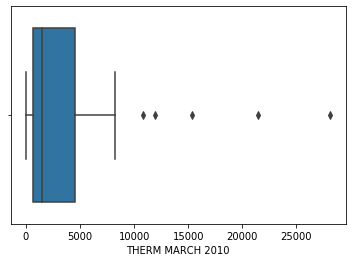

In [47]:
sns.boxplot(df1.loc[:,"THERM MARCH 2010"])
np.mean(df1.loc[:,"THERM MARCH 2010"])

In [48]:
#Checking every row for outliers

for j in df1.columns[3:15]:
    for i in range(len(df)):
        if(df1.loc[i,j] > 30000):
            df1.loc[i,j] = np.nan

In [49]:
df1

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
0,Near West Side,Industrial,Industrial,3253.0,3356.0,2334,702,175,34,32,32,34,49,208,1685.0,11894
1,North Lawndale,Industrial,Industrial,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0
2,Brighton Park,Industrial,Industrial,NaN,28683.0,11945,2780,81,5,1,0,0,0,0,78.0,81674
3,Hermosa,Industrial,Industrial,0.0,7225.0,8062,687,2,208,32,34,34,142,1141,6023.0,23590
4,Brighton Park,Industrial,Industrial,6279.0,5466.0,4906,1505,484,86,0,1,0,16,450,2803.0,21996
5,North Lawndale,Industrial,Industrial,2505.0,3313.0,2372,787,150,38,86,38,8,156,100,1786.0,11339
6,Near West Side,Industrial,Industrial,NaN,26720.0,15316,4184,2361,12,9,8,9,1213,14176,NaN,129782
7,Albany Park,Industrial,Industrial,2146.0,1963.0,1967,1038,681,475,336,344,486,549,621,1227.0,11833
8,Archer Heights,Industrial,Industrial,955.0,815.0,713,586,442,367,363,328,330,330,402,651.0,6282
9,Armour Square,Industrial,Industrial,5200.0,0.0,7012,1279,942,872,777,836,833,944,2678,5563.0,26936


In [50]:
df1 = df1.interpolate()
df1

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
0,Near West Side,Industrial,Industrial,3253.0,3356.0,2334,702,175,34,32,32,34,49,208,1685.0,11894
1,North Lawndale,Industrial,Industrial,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0
2,Brighton Park,Industrial,Industrial,0.0,28683.0,11945,2780,81,5,1,0,0,0,0,78.0,81674
3,Hermosa,Industrial,Industrial,0.0,7225.0,8062,687,2,208,32,34,34,142,1141,6023.0,23590
4,Brighton Park,Industrial,Industrial,6279.0,5466.0,4906,1505,484,86,0,1,0,16,450,2803.0,21996
5,North Lawndale,Industrial,Industrial,2505.0,3313.0,2372,787,150,38,86,38,8,156,100,1786.0,11339
6,Near West Side,Industrial,Industrial,2325.5,26720.0,15316,4184,2361,12,9,8,9,1213,14176,1506.5,129782
7,Albany Park,Industrial,Industrial,2146.0,1963.0,1967,1038,681,475,336,344,486,549,621,1227.0,11833
8,Archer Heights,Industrial,Industrial,955.0,815.0,713,586,442,367,363,328,330,330,402,651.0,6282
9,Armour Square,Industrial,Industrial,5200.0,0.0,7012,1279,942,872,777,836,833,944,2678,5563.0,26936


In [51]:
#Updating the total therm usage
summ=0
for i in range(len(df1)):
    for j in df1.columns[3:15]:
        summ+=df1.loc[i,j]
    df1.loc[i,"TOTAL THERMS"] = summ
    summ = 0
df1

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
0,Near West Side,Industrial,Industrial,3253.0,3356.0,2334,702,175,34,32,32,34,49,208,1685.0,11894.0
1,North Lawndale,Industrial,Industrial,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0
2,Brighton Park,Industrial,Industrial,0.0,28683.0,11945,2780,81,5,1,0,0,0,0,78.0,43573.0
3,Hermosa,Industrial,Industrial,0.0,7225.0,8062,687,2,208,32,34,34,142,1141,6023.0,23590.0
4,Brighton Park,Industrial,Industrial,6279.0,5466.0,4906,1505,484,86,0,1,0,16,450,2803.0,21996.0
5,North Lawndale,Industrial,Industrial,2505.0,3313.0,2372,787,150,38,86,38,8,156,100,1786.0,11339.0
6,Near West Side,Industrial,Industrial,2325.5,26720.0,15316,4184,2361,12,9,8,9,1213,14176,1506.5,67840.0
7,Albany Park,Industrial,Industrial,2146.0,1963.0,1967,1038,681,475,336,344,486,549,621,1227.0,11833.0
8,Archer Heights,Industrial,Industrial,955.0,815.0,713,586,442,367,363,328,330,330,402,651.0,6282.0
9,Armour Square,Industrial,Industrial,5200.0,0.0,7012,1279,942,872,777,836,833,944,2678,5563.0,26936.0


In [52]:
#Saving as a new data frame
df = df1
df.to_csv("Indus_Therm_Clean.csv")

In [12]:
df = pd.read_csv("Comm_Elect.csv")
df.columns

Index(['COMMUNITY AREA NAME', 'BUILDING TYPE', 'BUILDING_SUBTYPE',
       'KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010',
       'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 'KWH JULY 2010',
       'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010',
       'KWH NOVEMBER 2010', 'KWH DECEMBER 2010', 'TOTAL KWH'],
      dtype='object')

In [20]:
df.columns[3:15]

Index(['KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010',
       'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 'KWH JULY 2010',
       'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010',
       'KWH NOVEMBER 2010', 'KWH DECEMBER 2010'],
      dtype='object')

In [13]:
df.groupby(["BUILDING TYPE","BUILDING_SUBTYPE"]).mean()

KWH JANUARY 2010  KWH FEBRUARY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                        
Commercial    Commercial            70731.116771       68196.437701   
              Multi 7+              23543.028798       22233.484975   
              Multi < 7              4226.287093        4296.274321   
              Municipal            154115.021127      156001.866197   
              Single Family           603.000000         484.000000   

                                KWH MARCH 2010  KWH APRIL 2010   KWH MAY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                  
Commercial    Commercial          64114.718722    62733.044527   74049.214038   
              Multi 7+            19875.095159    18765.791736   23525.116444   
              Multi < 7            4074.509283     4014.308629    5032.610723   
              Municipal          145487.830986   137041.929577  158896.830986   
              Single Family         822.000000      744.000000     880.000000   

                                KWH JUNE 2010  KWH JULY 2010  KWH AUGUST 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                  
Commercial    Commercial         82394.357629   87804.258694     82848.674965   
              Multi 7+           29190.821786   31657.045910     28705.829299   
              Multi < 7           6304.199911    7016.382890      6547.346057   
              Municipal         172064.524648  183033.940141    175596.482394   
              Single Family       1527.000000    1335.000000       835.000000   

                                KWH SEPTEMBER 2010  KWH OCTOBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Commercial    Commercial              71880.043886      65603.934685   
              Multi 7+                22665.706177      20803.257095   
              Multi < 7                5137.549681       4704.588296   
              Municipal              153116.767606     140801.260563   
              Single Family             754.000000       1022.000000   

                                KWH NOVEMBER 2010  KWH DECEMBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Commercial    Commercial             75685.742590       86068.830232   
              Multi 7+               26921.901085       32177.750417   
              Multi < 7               5741.705778        6671.965988   
              Municipal             165025.556338      189913.728873   
              Single Family           1087.000000        1196.000000   

                                   TOTAL KWH  
BUILDING TYPE BUILDING_SUBTYPE                
Commercial    Commercial        8.921104e+05  
              Multi 7+          3.000648e+05  
              Multi < 7         6.376773e+04  
              Municipal         1.931096e+06  
              Single Family     1.128900e+04

49206.21409891323

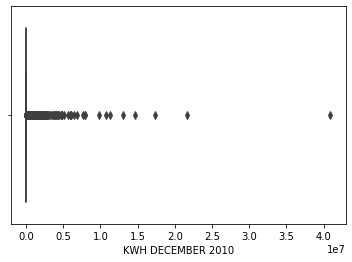

In [14]:
sns.boxplot(df.loc[:,"KWH DECEMBER 2010"])
np.mean(df.loc[:,"KWH DECEMBER 2010"])

In [17]:
#Replaced Outliers with the average values(neglecting the ones which dont use)
df1=df
a = 0
div = 0
m=0
n=0
for j in df1.columns[3:15]:
    for i in range(len(df1)):
        if(df1.loc[i,j] < 10000 and df1.loc[i,j]!=0 and df1.loc[i,"BUILDING_SUBTYPE"]=="Single Family"):
            a+=df1.loc[i,j]
            div+=1
    for i in range(len(df)):
        if(df1.loc[i,j] > 10000 and df1.loc[i,j]!=0 and df1.loc[i,"BUILDING_SUBTYPE"]=="Single Family"):
            df1.loc[i,j] = a/div
    a = 0
    div = 0
df1

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH
0,Auburn Gresham,Commercial,Multi < 7,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Austin,Commercial,Multi < 7,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Austin,Commercial,Multi < 7,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Austin,Commercial,Commercial,0,0,0,0,0,0,0,819,619,416,138,2,1994
4,Austin,Commercial,Commercial,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17202,Woodlawn,Commercial,Multi < 7,2901,2967,2459,2411,2915,5680,3813,3309,2089,2245,3077,6774,40640
17203,Woodlawn,Commercial,Multi < 7,1474,1611,1366,1055,1624,1514,1818,1977,1428,1761,1592,2516,19736
17204,Woodlawn,Commercial,Multi < 7,1724,1422,1200,1057,1183,1366,1643,1622,1091,1124,1389,1839,16660
17205,Woodlawn,Commercial,Multi < 7,1140,838,659,1137,3156,3449,3922,3989,3164,1900,2646,3288,29288


In [18]:
df1.groupby(["BUILDING TYPE","BUILDING_SUBTYPE"]).mean()

KWH JANUARY 2010  KWH FEBRUARY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                        
Commercial    Commercial            70731.116771       68196.437701   
              Multi 7+              23543.028798       22233.484975   
              Multi < 7              4226.287093        4296.274321   
              Municipal            154115.021127      156001.866197   
              Single Family           603.000000         484.000000   

                                KWH MARCH 2010  KWH APRIL 2010   KWH MAY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                  
Commercial    Commercial          64114.718722    62733.044527   74049.214038   
              Multi 7+            19875.095159    18765.791736   23525.116444   
              Multi < 7            4074.509283     4014.308629    5032.610723   
              Municipal          145487.830986   137041.929577  158896.830986   
              Single Family         822.000000      744.000000     880.000000   

                                KWH JUNE 2010  KWH JULY 2010  KWH AUGUST 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                  
Commercial    Commercial         82394.357629   87804.258694     82848.674965   
              Multi 7+           29190.821786   31657.045910     28705.829299   
              Multi < 7           6304.199911    7016.382890      6547.346057   
              Municipal         172064.524648  183033.940141    175596.482394   
              Single Family       1527.000000    1335.000000       835.000000   

                                KWH SEPTEMBER 2010  KWH OCTOBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Commercial    Commercial              71880.043886      65603.934685   
              Multi 7+                22665.706177      20803.257095   
              Multi < 7                5137.549681       4704.588296   
              Municipal              153116.767606     140801.260563   
              Single Family             754.000000       1022.000000   

                                KWH NOVEMBER 2010  KWH DECEMBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Commercial    Commercial             75685.742590       86068.830232   
              Multi 7+               26921.901085       32177.750417   
              Multi < 7               5741.705778        6671.965988   
              Municipal             165025.556338      189913.728873   
              Single Family           1087.000000        1196.000000   

                                   TOTAL KWH  
BUILDING TYPE BUILDING_SUBTYPE                
Commercial    Commercial        8.921104e+05  
              Multi 7+          3.000648e+05  
              Multi < 7         6.376773e+04  
              Municipal         1.931096e+06  
              Single Family     1.128900e+04

In [19]:
#Replaced Outliers with the average values(neglecting the ones which dont use)
#Index no 15 and 41
df1=df
a = 0
div = 0
m=0
n=0
for j in df1.columns[3:15]:
    for i in range(len(df1)):
        if(df1.loc[i,j] < 60000 and df1.loc[i,j]!=0 and df1.loc[i,"BUILDING_SUBTYPE"]=="Multi < 7"):
            a+=df1.loc[i,j]
            div+=1
    for i in range(len(df)):
        if(df1.loc[i,j] > 60000 and df1.loc[i,j]!=0 and df1.loc[i,"BUILDING_SUBTYPE"]=="Multi < 7"):
            df1.loc[i,j] = a/div
    a = 0
    div = 0
df1

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH
0,Auburn Gresham,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Austin,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Austin,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Austin,Commercial,Commercial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,819.0,619.0,416.0,138.0,2.0,1994
4,Austin,Commercial,Commercial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17202,Woodlawn,Commercial,Multi < 7,2901.0,2967.0,2459.0,2411.0,2915.0,5680.0,3813.0,3309.0,2089.0,2245.0,3077.0,6774.0,40640
17203,Woodlawn,Commercial,Multi < 7,1474.0,1611.0,1366.0,1055.0,1624.0,1514.0,1818.0,1977.0,1428.0,1761.0,1592.0,2516.0,19736
17204,Woodlawn,Commercial,Multi < 7,1724.0,1422.0,1200.0,1057.0,1183.0,1366.0,1643.0,1622.0,1091.0,1124.0,1389.0,1839.0,16660
17205,Woodlawn,Commercial,Multi < 7,1140.0,838.0,659.0,1137.0,3156.0,3449.0,3922.0,3989.0,3164.0,1900.0,2646.0,3288.0,29288


In [21]:
#Replaced Outliers with the average values(neglecting the ones which dont use)
#Index no 15 and 41
df1=df
a = 0
div = 0
m=0
n=0
for j in df1.columns[3:15]:
    for i in range(len(df1)):
        if(df1.loc[i,j] < 150000 and df1.loc[i,j]!=0 and df1.loc[i,"BUILDING_SUBTYPE"]=="Multi 7+"):
            a+=df1.loc[i,j]
            div+=1
    for i in range(len(df1)):
        if(df1.loc[i,j] > 150000 and df1.loc[i,j]!=0 and df1.loc[i,"BUILDING_SUBTYPE"]=="Multi 7+"):
            df1.loc[i,j] = a/div
    a = 0
    div = 0
df1

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH
0,Auburn Gresham,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Austin,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Austin,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Austin,Commercial,Commercial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,819.0,619.0,416.0,138.0,2.0,1994
4,Austin,Commercial,Commercial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17202,Woodlawn,Commercial,Multi < 7,2901.0,2967.0,2459.0,2411.0,2915.0,5680.0,3813.0,3309.0,2089.0,2245.0,3077.0,6774.0,40640
17203,Woodlawn,Commercial,Multi < 7,1474.0,1611.0,1366.0,1055.0,1624.0,1514.0,1818.0,1977.0,1428.0,1761.0,1592.0,2516.0,19736
17204,Woodlawn,Commercial,Multi < 7,1724.0,1422.0,1200.0,1057.0,1183.0,1366.0,1643.0,1622.0,1091.0,1124.0,1389.0,1839.0,16660
17205,Woodlawn,Commercial,Multi < 7,1140.0,838.0,659.0,1137.0,3156.0,3449.0,3922.0,3989.0,3164.0,1900.0,2646.0,3288.0,29288


In [22]:
df1.groupby(['BUILDING TYPE','BUILDING_SUBTYPE']).mean()

KWH JANUARY 2010  KWH FEBRUARY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                        
Commercial    Commercial            70731.116771       68196.437701   
              Multi 7+               9225.433187        9478.694697   
              Multi < 7              2679.296967        2826.517456   
              Municipal            154115.021127      156001.866197   
              Single Family           603.000000         484.000000   

                                KWH MARCH 2010  KWH APRIL 2010   KWH MAY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                  
Commercial    Commercial          64114.718722    62733.044527   74049.214038   
              Multi 7+             8972.439426     9446.742579   10952.387804   
              Multi < 7            2748.194423     2780.834299    3393.202673   
              Municipal          145487.830986   137041.929577  158896.830986   
              Single Family         822.000000      744.000000     880.000000   

                                KWH JUNE 2010  KWH JULY 2010  KWH AUGUST 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                  
Commercial    Commercial         82394.357629   87804.258694     82848.674965   
              Multi 7+           13124.115937   13829.241304     12748.294002   
              Multi < 7           4324.101327    4807.268036      4487.961982   
              Municipal         172064.524648  183033.940141    175596.482394   
              Single Family       1527.000000    1335.000000       835.000000   

                                KWH SEPTEMBER 2010  KWH OCTOBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Commercial    Commercial              71880.043886      65603.934685   
              Multi 7+                10692.791185      10418.114060   
              Multi < 7                3520.431055       3294.194203   
              Municipal              153116.767606     140801.260563   
              Single Family             754.000000       1022.000000   

                                KWH NOVEMBER 2010  KWH DECEMBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Commercial    Commercial             75685.742590       86068.830232   
              Multi 7+               12115.164342       13206.455526   
              Multi < 7               3952.799326        4514.392975   
              Municipal             165025.556338      189913.728873   
              Single Family           1087.000000        1196.000000   

                                   TOTAL KWH  
BUILDING TYPE BUILDING_SUBTYPE                
Commercial    Commercial        8.921104e+05  
              Multi 7+          3.000648e+05  
              Multi < 7         6.376773e+04  
              Municipal         1.931096e+06  
              Single Family     1.128900e+04

In [25]:
df1.values[:,3]

array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       ...,
       [1724.0, 1422.0, 1200.0, 1057.0, 1183.0, 1366.0],
       [1140.0, 838.0, 659.0, 1137.0, 3156.0, 3449.0],
       [1005.0, 1760.0, 1521.0, 1832.0, 2272.0, 2361.0]], dtype=object)

In [26]:
#Replaced Outliers with the average values(neglecting the ones which dont use)
#Index no 15 and 41
df1=df
a = 0
div = 0
m=0
n=0
for j in df1.columns[3:15]:
    for i in range(len(df1)):
        if(df1.loc[i,j] < 200000 and df1.loc[i,j]!=0 and df1.loc[i,"BUILDING_SUBTYPE"]=="Municipal"):
            a+=df1.loc[i,j]
            div+=1
    for i in range(len(df1)):
        if(df1.loc[i,j] > 200000 and df1.loc[i,j]!=0 and df1.loc[i,"BUILDING_SUBTYPE"]=="Municipal"):
            df1.loc[i,j] = a/div
    a = 0
    div = 0
df1

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH
0,Auburn Gresham,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Austin,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Austin,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Austin,Commercial,Commercial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,819.0,619.0,416.0,138.0,2.0,1994
4,Austin,Commercial,Commercial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17202,Woodlawn,Commercial,Multi < 7,2901.0,2967.0,2459.0,2411.0,2915.0,5680.0,3813.0,3309.0,2089.0,2245.0,3077.0,6774.0,40640
17203,Woodlawn,Commercial,Multi < 7,1474.0,1611.0,1366.0,1055.0,1624.0,1514.0,1818.0,1977.0,1428.0,1761.0,1592.0,2516.0,19736
17204,Woodlawn,Commercial,Multi < 7,1724.0,1422.0,1200.0,1057.0,1183.0,1366.0,1643.0,1622.0,1091.0,1124.0,1389.0,1839.0,16660
17205,Woodlawn,Commercial,Multi < 7,1140.0,838.0,659.0,1137.0,3156.0,3449.0,3922.0,3989.0,3164.0,1900.0,2646.0,3288.0,29288


In [27]:
df1.groupby(['BUILDING TYPE','BUILDING_SUBTYPE']).mean()

KWH JANUARY 2010  KWH FEBRUARY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                        
Commercial    Commercial            70731.116771       68196.437701   
              Multi 7+               9225.433187        9478.694697   
              Multi < 7              2679.296967        2826.517456   
              Municipal             30392.816474       29857.030647   
              Single Family           603.000000         484.000000   

                                KWH MARCH 2010  KWH APRIL 2010  KWH MAY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                 
Commercial    Commercial          64114.718722    62733.044527  74049.214038   
              Multi 7+             8972.439426     9446.742579  10952.387804   
              Multi < 7            2748.194423     2780.834299   3393.202673   
              Municipal           28872.086419    28356.036190  30505.966169   
              Single Family         822.000000      744.000000    880.000000   

                                KWH JUNE 2010  KWH JULY 2010  KWH AUGUST 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                  
Commercial    Commercial         82394.357629   87804.258694     82848.674965   
              Multi 7+           13124.115937   13829.241304     12748.294002   
              Multi < 7           4324.101327    4807.268036      4487.961982   
              Municipal          31748.009834   32302.070803     32619.827733   
              Single Family       1527.000000    1335.000000       835.000000   

                                KWH SEPTEMBER 2010  KWH OCTOBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Commercial    Commercial              71880.043886      65603.934685   
              Multi 7+                10692.791185      10418.114060   
              Multi < 7                3520.431055       3294.194203   
              Municipal               29217.429108      27988.684272   
              Single Family             754.000000       1022.000000   

                                KWH NOVEMBER 2010  KWH DECEMBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Commercial    Commercial             75685.742590       86068.830232   
              Multi 7+               12115.164342       13206.455526   
              Multi < 7               3952.799326        4514.392975   
              Municipal              30297.893272       33058.950930   
              Single Family           1087.000000        1196.000000   

                                   TOTAL KWH  
BUILDING TYPE BUILDING_SUBTYPE                
Commercial    Commercial        8.921104e+05  
              Multi 7+          3.000648e+05  
              Multi < 7         6.376773e+04  
              Municipal         1.931096e+06  
              Single Family     1.128900e+04

In [28]:
#Replaced Outliers with the average values(neglecting the ones which dont use)
#Index no 15 and 41
df1=df
a = 0
div = 0
m=0
n=0
for j in df1.columns[3:15]:
    for i in range(len(df1)):
        if(df1.loc[i,j] < 350000 and df1.loc[i,j]!=0 and df1.loc[i,"BUILDING_SUBTYPE"]=="Commercial"):
            a+=df1.loc[i,j]
            div+=1
    for i in range(len(df1)):
        if(df1.loc[i,j] > 350000 and df1.loc[i,j]!=0 and df1.loc[i,"BUILDING_SUBTYPE"]=="Commercial"):
            df1.loc[i,j] = a/div
    a = 0
    div = 0
df1

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH
0,Auburn Gresham,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Austin,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Austin,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Austin,Commercial,Commercial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,819.0,619.0,416.0,138.0,2.0,1994
4,Austin,Commercial,Commercial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17202,Woodlawn,Commercial,Multi < 7,2901.0,2967.0,2459.0,2411.0,2915.0,5680.0,3813.0,3309.0,2089.0,2245.0,3077.0,6774.0,40640
17203,Woodlawn,Commercial,Multi < 7,1474.0,1611.0,1366.0,1055.0,1624.0,1514.0,1818.0,1977.0,1428.0,1761.0,1592.0,2516.0,19736
17204,Woodlawn,Commercial,Multi < 7,1724.0,1422.0,1200.0,1057.0,1183.0,1366.0,1643.0,1622.0,1091.0,1124.0,1389.0,1839.0,16660
17205,Woodlawn,Commercial,Multi < 7,1140.0,838.0,659.0,1137.0,3156.0,3449.0,3922.0,3989.0,3164.0,1900.0,2646.0,3288.0,29288


In [29]:
df1.groupby(['BUILDING TYPE','BUILDING_SUBTYPE']).mean()

KWH JANUARY 2010  KWH FEBRUARY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                        
Commercial    Commercial            20367.275721       20289.206812   
              Multi 7+               9225.433187        9478.694697   
              Multi < 7              2679.296967        2826.517456   
              Municipal             30392.816474       29857.030647   
              Single Family           603.000000         484.000000   

                                KWH MARCH 2010  KWH APRIL 2010  KWH MAY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                 
Commercial    Commercial          19711.120813    19585.885852  22590.812015   
              Multi 7+             8972.439426     9446.742579  10952.387804   
              Multi < 7            2748.194423     2780.834299   3393.202673   
              Municipal           28872.086419    28356.036190  30505.966169   
              Single Family         822.000000      744.000000    880.000000   

                                KWH JUNE 2010  KWH JULY 2010  KWH AUGUST 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                  
Commercial    Commercial         25981.548626   26762.216568     25559.520630   
              Multi 7+           13124.115937   13829.241304     12748.294002   
              Multi < 7           4324.101327    4807.268036      4487.961982   
              Municipal          31748.009834   32302.070803     32619.827733   
              Single Family       1527.000000    1335.000000       835.000000   

                                KWH SEPTEMBER 2010  KWH OCTOBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Commercial    Commercial              21600.615940      20401.736238   
              Multi 7+                10692.791185      10418.114060   
              Multi < 7                3520.431055       3294.194203   
              Municipal               29217.429108      27988.684272   
              Single Family             754.000000       1022.000000   

                                KWH NOVEMBER 2010  KWH DECEMBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Commercial    Commercial             22741.877506       23941.358398   
              Multi 7+               12115.164342       13206.455526   
              Multi < 7               3952.799326        4514.392975   
              Municipal              30297.893272       33058.950930   
              Single Family           1087.000000        1196.000000   

                                   TOTAL KWH  
BUILDING TYPE BUILDING_SUBTYPE                
Commercial    Commercial        8.921104e+05  
              Multi 7+          3.000648e+05  
              Multi < 7         6.376773e+04  
              Municipal         1.931096e+06  
              Single Family     1.128900e+04

In [32]:
#Updating the total therm usage
summ=0
for i in range(len(df1)):
    for j in df1.columns[3:15]:
        summ+=df1.loc[i,j]
    df1.loc[i,"TOTAL KWH"] = summ
    summ = 0
df1 = df1.drop('TOTAL THERMS',axis=1)
df1

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH
0,Auburn Gresham,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Austin,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Austin,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Austin,Commercial,Commercial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,819.0,619.0,416.0,138.0,2.0,1994.0
4,Austin,Commercial,Commercial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17202,Woodlawn,Commercial,Multi < 7,2901.0,2967.0,2459.0,2411.0,2915.0,5680.0,3813.0,3309.0,2089.0,2245.0,3077.0,6774.0,40640.0
17203,Woodlawn,Commercial,Multi < 7,1474.0,1611.0,1366.0,1055.0,1624.0,1514.0,1818.0,1977.0,1428.0,1761.0,1592.0,2516.0,19736.0
17204,Woodlawn,Commercial,Multi < 7,1724.0,1422.0,1200.0,1057.0,1183.0,1366.0,1643.0,1622.0,1091.0,1124.0,1389.0,1839.0,16660.0
17205,Woodlawn,Commercial,Multi < 7,1140.0,838.0,659.0,1137.0,3156.0,3449.0,3922.0,3989.0,3164.0,1900.0,2646.0,3288.0,29288.0


In [33]:
df1.groupby(['BUILDING TYPE','BUILDING_SUBTYPE']).mean()

KWH JANUARY 2010  KWH FEBRUARY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                        
Commercial    Commercial            20367.275721       20289.206812   
              Multi 7+               9225.433187        9478.694697   
              Multi < 7              2679.296967        2826.517456   
              Municipal             30392.816474       29857.030647   
              Single Family           603.000000         484.000000   

                                KWH MARCH 2010  KWH APRIL 2010  KWH MAY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                 
Commercial    Commercial          19711.120813    19585.885852  22590.812015   
              Multi 7+             8972.439426     9446.742579  10952.387804   
              Multi < 7            2748.194423     2780.834299   3393.202673   
              Municipal           28872.086419    28356.036190  30505.966169   
              Single Family         822.000000      744.000000    880.000000   

                                KWH JUNE 2010  KWH JULY 2010  KWH AUGUST 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                  
Commercial    Commercial         25981.548626   26762.216568     25559.520630   
              Multi 7+           13124.115937   13829.241304     12748.294002   
              Multi < 7           4324.101327    4807.268036      4487.961982   
              Municipal          31748.009834   32302.070803     32619.827733   
              Single Family       1527.000000    1335.000000       835.000000   

                                KWH SEPTEMBER 2010  KWH OCTOBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Commercial    Commercial              21600.615940      20401.736238   
              Multi 7+                10692.791185      10418.114060   
              Multi < 7                3520.431055       3294.194203   
              Municipal               29217.429108      27988.684272   
              Single Family             754.000000       1022.000000   

                                KWH NOVEMBER 2010  KWH DECEMBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Commercial    Commercial             22741.877506       23941.358398   
              Multi 7+               12115.164342       13206.455526   
              Multi < 7               3952.799326        4514.392975   
              Municipal              30297.893272       33058.950930   
              Single Family           1087.000000        1196.000000   

                                    TOTAL KWH  
BUILDING TYPE BUILDING_SUBTYPE                 
Commercial    Commercial        269533.175120  
              Multi 7+          134209.874050  
              Multi < 7          43329.194720  
              Municipal         365216.801851  
              Single Family      11289.000000

In [34]:
df = df1
df.to_csv("Comm_Elect_Clean.csv")

In [35]:
df = pd.read_csv("Comm_Therm.csv")

In [39]:
df1 = df
df1

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
0,Auburn Gresham,Commercial,Multi < 7,1561,1388,1507,701,486,380,18,16,0,0,0,0,6057
1,Austin,Commercial,Multi < 7,0,0,0,0,0,0,0,0,0,0,9,391,400
2,Austin,Commercial,Multi < 7,310,268,163,77,57,23,19,8,14,10,0,0,949
3,Austin,Commercial,Commercial,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Austin,Commercial,Commercial,3041,2680,1151,373,124,26,29,25,49,177,670,3895,12240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17202,Woodlawn,Commercial,Multi < 7,2734,2099,1986,1211,696,250,136,159,128,175,790,2008,12372
17203,Woodlawn,Commercial,Multi < 7,447,364,340,177,119,59,38,40,40,56,121,272,2073
17204,Woodlawn,Commercial,Multi < 7,1047,784,757,392,271,137,65,67,60,84,252,486,4402
17205,Woodlawn,Commercial,Multi < 7,1773,1380,1306,905,605,418,311,305,292,430,852,1483,10060


In [43]:
for column in df1.columns[3:15]:
    for row in range(len(df1)):
        if(df1.loc[row,column] > 80000 and df1.loc[row,"BUILDING_SUBTYPE"]=="Commercial"):
            df1.loc[row,column] = np.nan
    for row in range(len(df1)):
        if(df1.loc[row,column] > 40000 and df1.loc[row,"BUILDING_SUBTYPE"]=="Multi < 7"):
            df1.loc[row,column] = np.nan
    for row in range(len(df1)):
        if(df1.loc[row,column] > 60000 and df1.loc[row,"BUILDING_SUBTYPE"]=="Multi 7+"):
            df1.loc[row,column] = np.nan
    for row in range(len(df1)):
        if(df1.loc[row,column] > 40000 and df1.loc[row,"BUILDING_SUBTYPE"]=="Municipal"):
            df1.loc[row,column] = np.nan

In [48]:
df1.loc[9820:9830,:]
#df1 = df1.interpolate()

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
9820,Loop,Commercial,Commercial,NaN,NaN,67553.0,18116.0,11646.0,3909.0,3328.0,3500.0,3746.0,14266.0,62300.0,NaN,523160
9821,Loop,Commercial,Commercial,575.0,596.0,573.0,459.0,456.0,371.0,334.0,373.0,344.0,394.0,497.0,830.0,5802
9822,Loop,Commercial,Commercial,23822.0,11392.0,5484.0,17334.0,5916.0,6751.0,3523.0,3864.0,3521.0,6427.0,10288.0,16502.0,114824
9823,Loop,Commercial,Commercial,3797.0,2626.0,3428.0,3638.0,3426.0,2418.0,3898.0,2234.0,3422.0,2876.0,2991.0,2964.0,37718
9824,Loop,Commercial,Commercial,3153.0,2791.0,2795.0,2805.0,2956.0,2801.0,2951.0,2947.0,2590.0,3334.0,2993.0,3013.0,35129
9825,Loop,Commercial,Commercial,2654.0,3174.0,2955.0,2482.0,2584.0,2498.0,2014.0,2227.0,1959.0,2394.0,2470.0,2894.0,30305
9826,Loop,Commercial,Commercial,37900.0,31810.0,22747.0,11689.0,8131.0,5238.0,5395.0,5225.0,6471.0,9371.0,18131.0,33827.0,195935
9827,Loop,Commercial,Commercial,5161.0,4873.0,3872.0,2607.0,2443.0,1933.0,1868.0,2045.0,1800.0,1738.0,2727.0,5538.0,36605
9828,Loop,Commercial,Commercial,53008.0,40766.0,32034.0,16032.0,15123.0,12461.0,11610.0,11929.0,11766.0,16797.0,25308.0,47923.0,294757
9829,Loop,Commercial,Municipal,NaN,NaN,37000.0,18699.0,6876.0,593.0,623.0,589.0,533.0,7482.0,30785.0,NaN,305905


In [50]:
df1 = df1.interpolate()
df1.loc[9820:9830,:]

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
9820,Loop,Commercial,Commercial,287.5,298.0,67553.0,18116.0,11646.0,3909.0,3328.0,3500.0,3746.0,14266.0,62300.0,415.0,523160
9821,Loop,Commercial,Commercial,575.0,596.0,573.0,459.0,456.0,371.0,334.0,373.0,344.0,394.0,497.0,830.0,5802
9822,Loop,Commercial,Commercial,23822.0,11392.0,5484.0,17334.0,5916.0,6751.0,3523.0,3864.0,3521.0,6427.0,10288.0,16502.0,114824
9823,Loop,Commercial,Commercial,3797.0,2626.0,3428.0,3638.0,3426.0,2418.0,3898.0,2234.0,3422.0,2876.0,2991.0,2964.0,37718
9824,Loop,Commercial,Commercial,3153.0,2791.0,2795.0,2805.0,2956.0,2801.0,2951.0,2947.0,2590.0,3334.0,2993.0,3013.0,35129
9825,Loop,Commercial,Commercial,2654.0,3174.0,2955.0,2482.0,2584.0,2498.0,2014.0,2227.0,1959.0,2394.0,2470.0,2894.0,30305
9826,Loop,Commercial,Commercial,37900.0,31810.0,22747.0,11689.0,8131.0,5238.0,5395.0,5225.0,6471.0,9371.0,18131.0,33827.0,195935
9827,Loop,Commercial,Commercial,5161.0,4873.0,3872.0,2607.0,2443.0,1933.0,1868.0,2045.0,1800.0,1738.0,2727.0,5538.0,36605
9828,Loop,Commercial,Commercial,53008.0,40766.0,32034.0,16032.0,15123.0,12461.0,11610.0,11929.0,11766.0,16797.0,25308.0,47923.0,294757
9829,Loop,Commercial,Municipal,53873.0,43057.5,37000.0,18699.0,6876.0,593.0,623.0,589.0,533.0,7482.0,30785.0,40612.5,305905


In [51]:
#Updating the total therm usage
summ=0
for i in range(len(df1)):
    for j in df1.columns[3:15]:
        summ+=df1.loc[i,j]
    df1.loc[i,"TOTAL THERMS"] = summ
    summ = 0
df1

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
0,Auburn Gresham,Commercial,Multi < 7,1561.0,1388.0,1507.0,701.0,486.0,380.0,18.0,16.0,0.0,0.0,0.0,0.0,6057.0
1,Austin,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,391.0,400.0
2,Austin,Commercial,Multi < 7,310.0,268.0,163.0,77.0,57.0,23.0,19.0,8.0,14.0,10.0,0.0,0.0,949.0
3,Austin,Commercial,Commercial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Austin,Commercial,Commercial,3041.0,2680.0,1151.0,373.0,124.0,26.0,29.0,25.0,49.0,177.0,670.0,3895.0,12240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17202,Woodlawn,Commercial,Multi < 7,2734.0,2099.0,1986.0,1211.0,696.0,250.0,136.0,159.0,128.0,175.0,790.0,2008.0,12372.0
17203,Woodlawn,Commercial,Multi < 7,447.0,364.0,340.0,177.0,119.0,59.0,38.0,40.0,40.0,56.0,121.0,272.0,2073.0
17204,Woodlawn,Commercial,Multi < 7,1047.0,784.0,757.0,392.0,271.0,137.0,65.0,67.0,60.0,84.0,252.0,486.0,4402.0
17205,Woodlawn,Commercial,Multi < 7,1773.0,1380.0,1306.0,905.0,605.0,418.0,311.0,305.0,292.0,430.0,852.0,1483.0,10060.0


In [53]:
df1 = df
df.to_csv("Comm_Therm_Clean.csv")

In [14]:
df = pd.read_csv("Resi_Therm.csv")
df

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
0,Archer Heights,Residential,Multi < 7,2326,2131,1400,620,502,224,222,187,197,252,744,2112,10917
1,Ashburn,Residential,Multi 7+,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Austin,Residential,Multi 7+,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Austin,Residential,Multi 7+,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Austin,Residential,Multi < 7,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49797,Woodlawn,Residential,Multi < 7,6914,5433,5054,2967,2241,1107,770,674,788,954,2423,4619,33944
49798,Woodlawn,Residential,Single Family,2166,1681,1858,1172,708,360,72,67,77,185,623,1800,10769
49799,Woodlawn,Residential,Multi < 7,2202,1874,1647,906,645,346,84,150,150,260,694,1335,10293
49800,Woodlawn,Residential,Single Family,95,11,47,9,45,18,22,9,17,11,18,13,315


In [57]:
df1 = df
for column in df1.columns[3:15]:
    for row in range(len(df1)):
        if(df1.loc[row,column] > 35000 and df1.loc[row,"BUILDING_SUBTYPE"]=="Multi < 7"):
            df1.loc[row,column] = np.nan
    for row in range(len(df1)):
        if(df1.loc[row,column] > 50000 and df1.loc[row,"BUILDING_SUBTYPE"]=="Multi 7+"):
            df1.loc[row,column] = np.nan
    for row in range(len(df1)):
        if(df1.loc[row,column] > 20000 and df1.loc[row,"BUILDING_SUBTYPE"]=="Single Family"):
            df1.loc[row,column] = np.nan

In [58]:
df1 = df1.interpolate()
df = df1
df.to_csv("Resi_Therm_Clean.csv")

In [46]:
df = pd.read_csv("Resi_Elect.csv")
df1 = df

In [47]:
df.groupby(['BUILDING TYPE','BUILDING_SUBTYPE']).mean()

KWH JANUARY 2010  KWH FEBRUARY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                        
Residential   Multi 7+               7207.730389        7026.382686   
              Multi < 7              6157.234079        6568.647691   
              Single Family         11929.170480       11945.277138   

                                KWH MARCH 2010  KWH APRIL 2010  KWH MAY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                 
Residential   Multi 7+             6125.063604     5826.230035   7291.043816   
              Multi < 7            6285.986534     6138.880068   7197.375207   
              Single Family       11196.479509    11195.865275  13795.238694   

                                KWH JUNE 2010  KWH JULY 2010  KWH AUGUST 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                  
Residential   Multi 7+            9716.431449   10355.535689      9326.568551   
              Multi < 7           9563.041857   10918.659796     10044.259358   
              Single Family      17953.474131   19387.766533     16666.276873   

                                KWH SEPTEMBER 2010  KWH OCTOBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Residential   Multi 7+                 7179.637456       7242.315548   
              Multi < 7                7676.880651       7368.089548   
              Single Family           12799.220173      12064.124044   

                                KWH NOVEMBER 2010  KWH DECEMBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Residential   Multi 7+               10454.190459       12412.025795   
              Multi < 7               9501.591736       11280.147496   
              Single Family          15408.856337       16902.147602   

                                    TOTAL KWH  
BUILDING TYPE BUILDING_SUBTYPE                 
Residential   Multi 7+          100163.155477  
              Multi < 7          98700.794020  
              Single Family     171243.896788

In [45]:
#Replaced Outliers with the average values(neglecting the ones which dont use)
df1=df
a = 0
div = 0
m=0
n=0
for j in df1.columns[3:15]:
    for i in range(len(df1)):
        if(df1.loc[i,j] < 60000 and df1.loc[i,j]!=0 and df1.loc[i,"BUILDING_SUBTYPE"]=="Multi < 7"):
            a+=df1.loc[i,j]
            div+=1
    for i in range(len(df)):
        if(df1.loc[i,j] > 60000 and df1.loc[i,j]!=0 and df1.loc[i,"BUILDING_SUBTYPE"]=="Multi < 7"):
            df1.loc[i,j] = a/div
    a = 0
    div = 0
df1

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH
0,Archer Heights,Residential,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Ashburn,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,4566.0,2787.0,3357.0,5540.0,15774.0,19676.0,82064
2,Austin,Residential,Multi 7+,2461.0,4888.0,2893.0,2737.0,2350.0,3037.0,3874.0,4861.0,5180.0,2984.0,2635.0,3597.0,41497
3,Austin,Residential,Multi 7+,0.0,0.0,0.0,0.0,0.0,511.0,904.0,1818.0,1968.0,738.0,450.0,2207.0,8596
4,Austin,Residential,Multi < 7,96.0,202.0,1837.0,1118.0,669.0,889.0,812.0,1880.0,1743.0,696.0,684.0,903.0,11529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49797,Woodlawn,Residential,Multi < 7,9572.0,9104.0,8525.0,7756.0,11256.0,11669.0,12099.0,13200.0,9694.0,8419.0,19077.0,18869.0,139240
49798,Woodlawn,Residential,Single Family,2705.0,1318.0,1582.0,1465.0,1494.0,2990.0,2449.0,2351.0,1213.0,2174.0,2888.0,5025.0,27654
49799,Woodlawn,Residential,Multi < 7,3567.0,3031.0,2582.0,2295.0,7902.0,4987.0,5773.0,3996.0,3050.0,3103.0,3880.0,4684.0,48850
49800,Woodlawn,Residential,Single Family,1208.0,1055.0,1008.0,1109.0,1591.0,1367.0,1569.0,1551.0,1376.0,1236.0,2108.0,2529.0,17707


In [41]:
df.groupby(['BUILDING TYPE','BUILDING_SUBTYPE']).mean()

KWH JANUARY 2010  KWH FEBRUARY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                        
Residential   Multi 7+               7207.730389        7026.382686   
              Multi < 7              4042.785972        4429.844337   
              Single Family         11929.170480       11945.277138   

                                KWH MARCH 2010  KWH APRIL 2010  KWH MAY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                 
Residential   Multi 7+             6125.063604     5826.230035   7291.043816   
              Multi < 7            4329.745309     4212.477453   5118.042855   
              Single Family       11196.479509    11195.865275  13795.238694   

                                KWH JUNE 2010  KWH JULY 2010  KWH AUGUST 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                  
Residential   Multi 7+            9716.431449   10355.535689      9326.568551   
              Multi < 7           7096.502552    8400.477738      7622.494558   
              Single Family      17953.474131   19387.766533     16666.276873   

                                KWH SEPTEMBER 2010  KWH OCTOBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Residential   Multi 7+                 7179.637456       7242.315548   
              Multi < 7                5601.479972       5267.630986   
              Single Family           12799.220173      12064.124044   

                                KWH NOVEMBER 2010  KWH DECEMBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Residential   Multi 7+               10454.190459       12412.025795   
              Multi < 7               7015.529387        8350.071431   
              Single Family          15408.856337       16902.147602   

                                    TOTAL KWH  
BUILDING TYPE BUILDING_SUBTYPE                 
Residential   Multi 7+          100163.155477  
              Multi < 7          98700.794020  
              Single Family     171243.896788

In [42]:
#Replaced Outliers with the average values(neglecting the ones which dont use)
df1=df
a = 0
div = 0
m=0
n=0
for j in df1.columns[3:15]:
    for i in range(len(df1)):
        if(df1.loc[i,j] < 150000 and df1.loc[i,j]!=0 and df1.loc[i,"BUILDING_SUBTYPE"]=="Multi 7+"):
            a+=df1.loc[i,j]
            div+=1
    for i in range(len(df)):
        if(df1.loc[i,j] > 150000 and df1.loc[i,j]!=0 and df1.loc[i,"BUILDING_SUBTYPE"]=="Multi 7+"):
            df1.loc[i,j] = a/div
    a = 0
    div = 0
df1

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH
0,Archer Heights,Residential,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Ashburn,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,4566.0,2787.0,3357.0,5540.0,15774.0,19676.0,82064
2,Austin,Residential,Multi 7+,2461.0,4888.0,2893.0,2737.0,2350.0,3037.0,3874.0,4861.0,5180.0,2984.0,2635.0,3597.0,41497
3,Austin,Residential,Multi 7+,0.0,0.0,0.0,0.0,0.0,511.0,904.0,1818.0,1968.0,738.0,450.0,2207.0,8596
4,Austin,Residential,Multi < 7,96.0,202.0,1837.0,1118.0,669.0,889.0,812.0,1880.0,1743.0,696.0,684.0,903.0,11529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49797,Woodlawn,Residential,Multi < 7,9572.0,9104.0,8525.0,7756.0,11256.0,11669.0,12099.0,13200.0,9694.0,8419.0,19077.0,18869.0,139240
49798,Woodlawn,Residential,Single Family,2705.0,1318.0,1582.0,1465.0,1494.0,2990.0,2449.0,2351.0,1213.0,2174.0,2888.0,5025.0,27654
49799,Woodlawn,Residential,Multi < 7,3567.0,3031.0,2582.0,2295.0,7902.0,4987.0,5773.0,3996.0,3050.0,3103.0,3880.0,4684.0,48850
49800,Woodlawn,Residential,Single Family,1208.0,1055.0,1008.0,1109.0,1591.0,1367.0,1569.0,1551.0,1376.0,1236.0,2108.0,2529.0,17707


In [34]:
df.groupby(['BUILDING TYPE','BUILDING_SUBTYPE']).mean()

KWH JANUARY 2010  KWH FEBRUARY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                        
Residential   Multi 7+               4942.969602        5038.012295   
              Multi < 7              4042.785972        4429.844337   
              Single Family         11929.170480       11945.277138   

                                KWH MARCH 2010  KWH APRIL 2010  KWH MAY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                 
Residential   Multi 7+             4697.520274     4591.921304   5651.315783   
              Multi < 7            4329.745309     4212.477453   5118.042855   
              Single Family       11196.479509    11195.865275  13795.238694   

                                KWH JUNE 2010  KWH JULY 2010  KWH AUGUST 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                  
Residential   Multi 7+            7764.013179    8471.771069      7456.155692   
              Multi < 7           7096.502552    8400.477738      7622.494558   
              Single Family      17953.474131   19387.766533     16666.276873   

                                KWH SEPTEMBER 2010  KWH OCTOBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Residential   Multi 7+                 5782.242470       5800.465130   
              Multi < 7                5601.479972       5267.630986   
              Single Family           12799.220173      12064.124044   

                                KWH NOVEMBER 2010  KWH DECEMBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Residential   Multi 7+                7666.114403        8746.050093   
              Multi < 7               7015.529387        8350.071431   
              Single Family          15408.856337       16902.147602   

                                    TOTAL KWH  
BUILDING TYPE BUILDING_SUBTYPE                 
Residential   Multi 7+          100163.155477  
              Multi < 7          98700.794020  
              Single Family     171243.896788

In [48]:
#Replaced Outliers with the average values(neglecting the ones which dont use)
df1=df
a = 0
div = 0
m=0
n=0
for j in df1.columns[3:15]:
    for i in range(len(df1)):
        if(df1.loc[i,j] < 30000 and df1.loc[i,j]!=0 and df1.loc[i,"BUILDING_SUBTYPE"]=="Single Family"):
            a+=df1.loc[i,j]
            div+=1
    for i in range(len(df)):
        if(df1.loc[i,j] > 30000 and df1.loc[i,j]!=0 and df1.loc[i,"BUILDING_SUBTYPE"]=="Single Family"):
            df1.loc[i,j] = a/div
    a = 0
    div = 0
df1

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH
0,Archer Heights,Residential,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Ashburn,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,4566.0,2787.0,3357.0,5540.0,15774.0,19676.0,82064
2,Austin,Residential,Multi 7+,2461.0,4888.0,2893.0,2737.0,2350.0,3037.0,3874.0,4861.0,5180.0,2984.0,2635.0,3597.0,41497
3,Austin,Residential,Multi 7+,0.0,0.0,0.0,0.0,0.0,511.0,904.0,1818.0,1968.0,738.0,450.0,2207.0,8596
4,Austin,Residential,Multi < 7,96.0,202.0,1837.0,1118.0,669.0,889.0,812.0,1880.0,1743.0,696.0,684.0,903.0,11529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49797,Woodlawn,Residential,Multi < 7,9572.0,9104.0,8525.0,7756.0,11256.0,11669.0,12099.0,13200.0,9694.0,8419.0,19077.0,18869.0,139240
49798,Woodlawn,Residential,Single Family,2705.0,1318.0,1582.0,1465.0,1494.0,2990.0,2449.0,2351.0,1213.0,2174.0,2888.0,5025.0,27654
49799,Woodlawn,Residential,Multi < 7,3567.0,3031.0,2582.0,2295.0,7902.0,4987.0,5773.0,3996.0,3050.0,3103.0,3880.0,4684.0,48850
49800,Woodlawn,Residential,Single Family,1208.0,1055.0,1008.0,1109.0,1591.0,1367.0,1569.0,1551.0,1376.0,1236.0,2108.0,2529.0,17707


In [49]:
df.groupby(['BUILDING TYPE','BUILDING_SUBTYPE']).su()

KWH JANUARY 2010  KWH FEBRUARY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                        
Residential   Multi 7+               7207.730389        7026.382686   
              Multi < 7              6157.234079        6568.647691   
              Single Family          5335.800050        5517.960428   

                                KWH MARCH 2010  KWH APRIL 2010  KWH MAY 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                 
Residential   Multi 7+             6125.063604     5826.230035   7291.043816   
              Multi < 7            6285.986534     6138.880068   7197.375207   
              Single Family        5252.711948     5236.490356   6717.544931   

                                KWH JUNE 2010  KWH JULY 2010  KWH AUGUST 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                                  
Residential   Multi 7+            9716.431449   10355.535689      9326.568551   
              Multi < 7           9563.041857   10918.659796     10044.259358   
              Single Family       9389.045864   10480.235726      8833.512676   

                                KWH SEPTEMBER 2010  KWH OCTOBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Residential   Multi 7+                 7179.637456       7242.315548   
              Multi < 7                7676.880651       7368.089548   
              Single Family            6225.028247       5948.174868   

                                KWH NOVEMBER 2010  KWH DECEMBER 2010  \
BUILDING TYPE BUILDING_SUBTYPE                                         
Residential   Multi 7+               10454.190459       12412.025795   
              Multi < 7               9501.591736       11280.147496   
              Single Family           8037.858926        8993.221830   

                                    TOTAL KWH  
BUILDING TYPE BUILDING_SUBTYPE                 
Residential   Multi 7+          100163.155477  
              Multi < 7          98700.794020  
              Single Family     171243.896788